In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

In [3]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.33 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [4]:
netflix_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Get a concise summary of the dataframe
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [7]:
# 1. Handle missing values in 'director' and 'cast'
# Since these are text fields and many are missing, we'll fill them with 'Unknown'.
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [8]:
# 2. Handle missing 'country'
# We'll fill with the mode, which is the most common country.
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [9]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [10]:
# 4. Convert 'date_added' to datetime objects
# Use format='mixed' to handle potential variations in date formats
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [11]:
# 5. Create new features for year and month added
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [12]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


**Exploratory Data Analysis & Visualization**

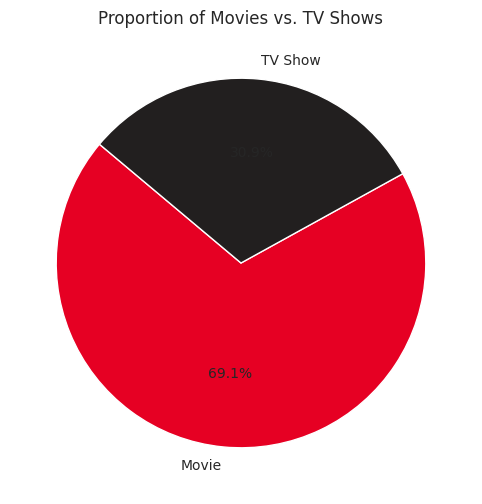

In [13]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

Insight: The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

<Figure size 1400x800 with 0 Axes>

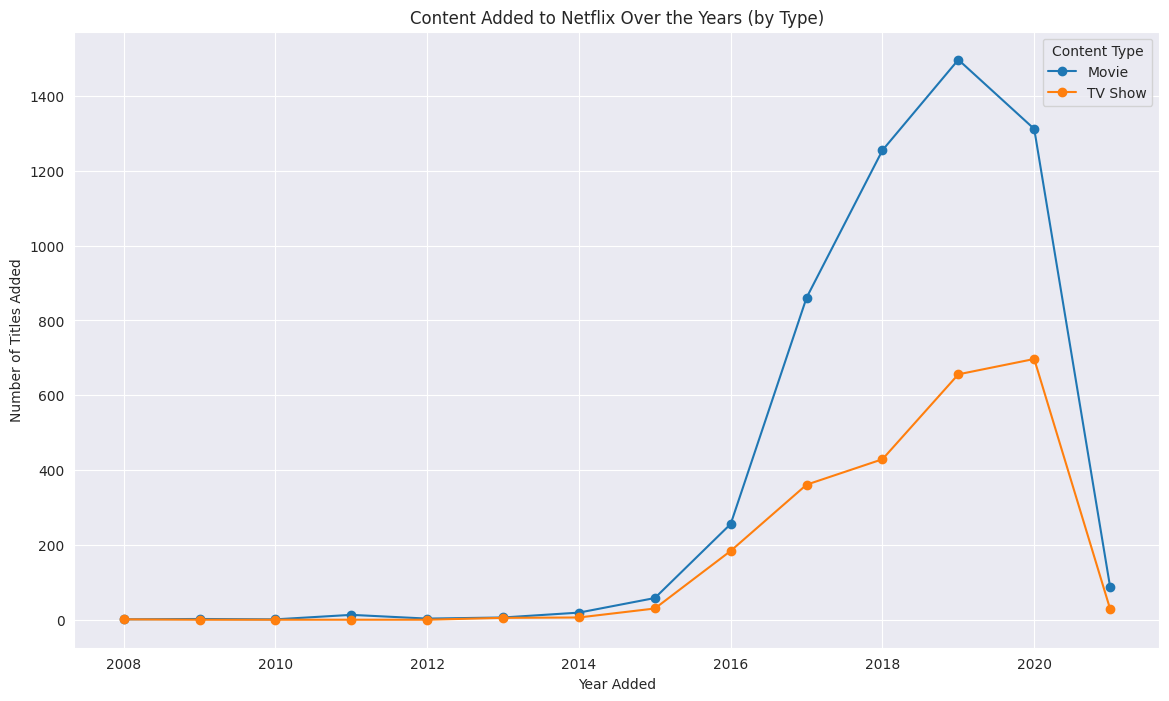

In [14]:
# Group data by year and content type
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

Insight: By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

In [15]:
# Split the 'listed_in' column and explode it
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

The listed_in column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data. A common technique is to:

Split the string in each row into a list of genres.
Explode the DataFrame so that each genre in the list gets its own row, duplicating the other information for that title. This allows us to perform a value_counts() on the genres.

/tmp/ipython-input-559900965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre',x='count',data=genres_count.head(15),legend=False,palette='viridis')


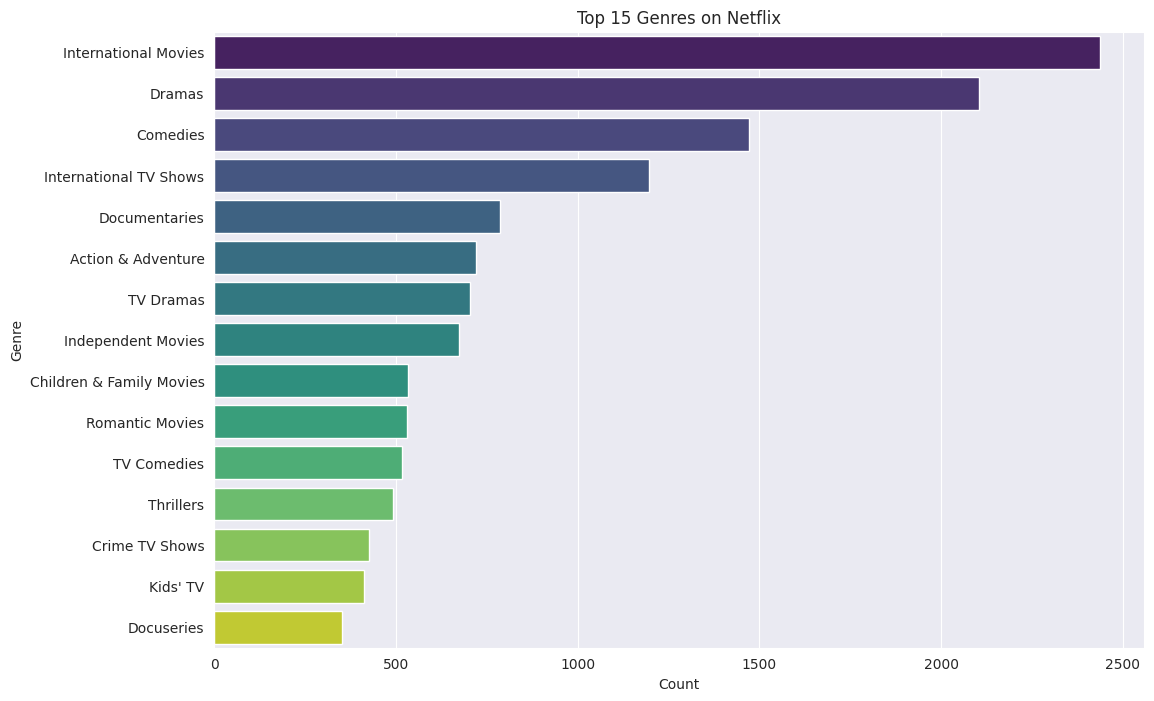

In [16]:
#top 15 genres and their counts
genres_count=genres['genre'].value_counts().reset_index()


plt.figure(figsize=(12,8))
sns.barplot(y='genre',x='count',data=genres_count.head(15),legend=False,palette='viridis')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Insight: "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

In [17]:
tvshow=netflix_df[netflix_df['type']=='TV Show'].copy()
Movies=netflix_df[netflix_df['type']=='Movie'].copy()

In [18]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [19]:
tvshow['season']=tvshow['duration'].str.split(' ').str[0].astype(int)
Movies['duration']=Movies['duration'].str.split(' ').str[0].astype(int)

In [20]:
tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,1
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,1
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,1


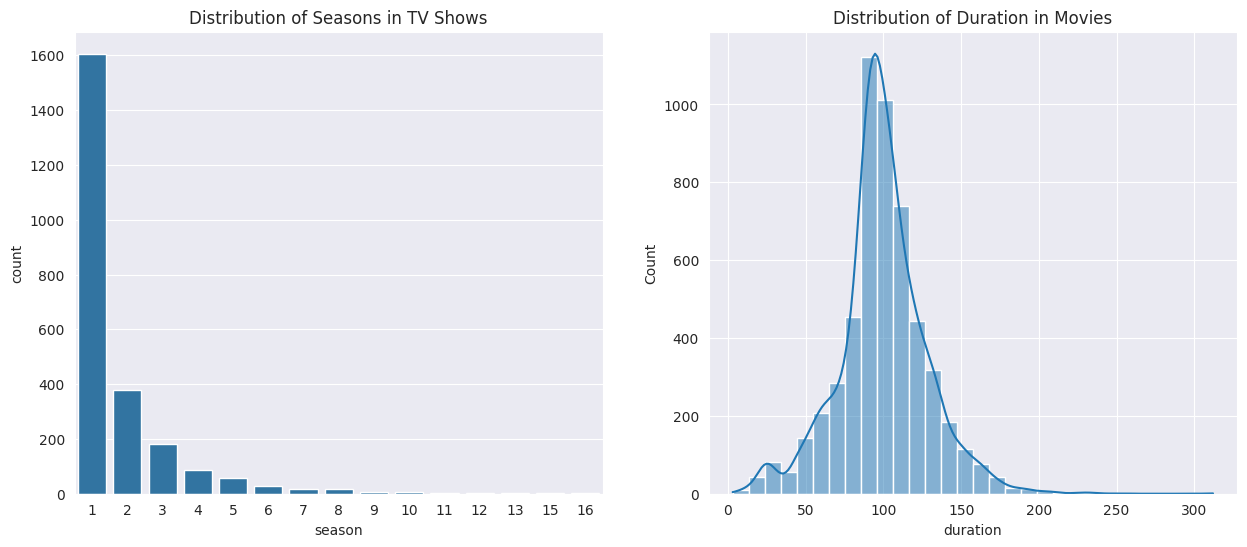

In [21]:
#plot the distribution
fig,axes=plt.subplot(1,2,figsize=(15,6))

sns.histplot(axes[0],data=tvshow,x='season',kde=True).set_title("Distribution of Seasons in TV Shows")
sns.histplot(axes[1],data=Movies,x='duration',bins=30,kde=True).set_title("Distribution of Duration in Movies")

plt.show()


The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

<Axes: xlabel='count', ylabel='country'>

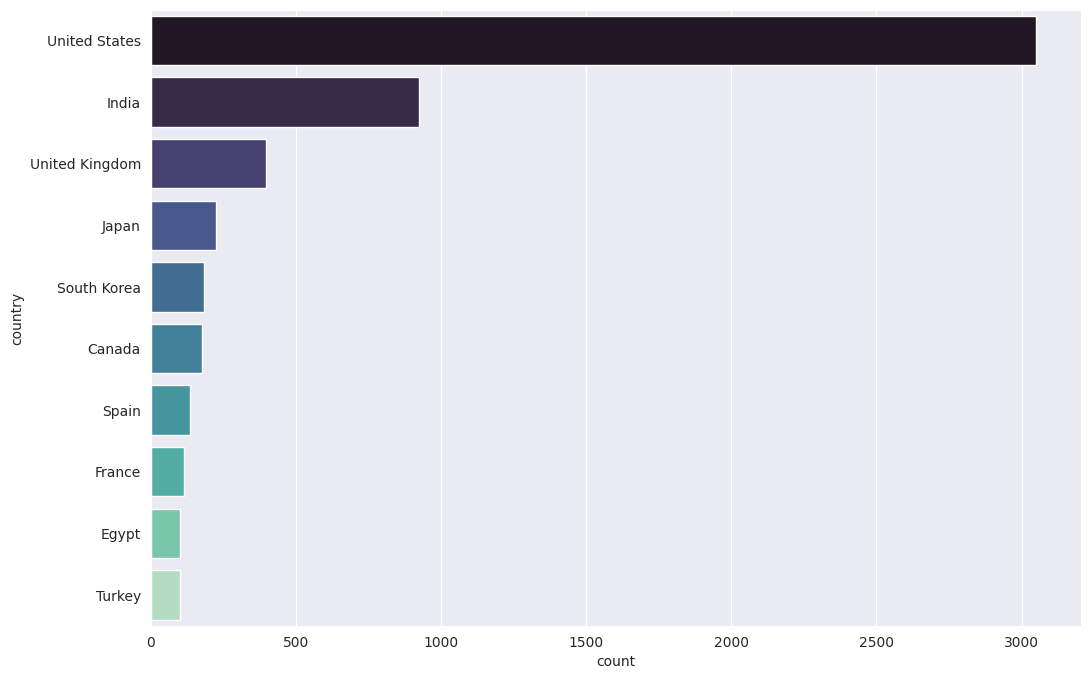

In [22]:
#analyse where the most of the content come from
country_count=netflix_df['country'].value_counts().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(y='country',x='count',data=country_count.head(10),palette='mako',hue='country')

Insight: The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

In [23]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [24]:
netflix_df.rating.value_counts()

,count
rating,
TV-MA,2861
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194


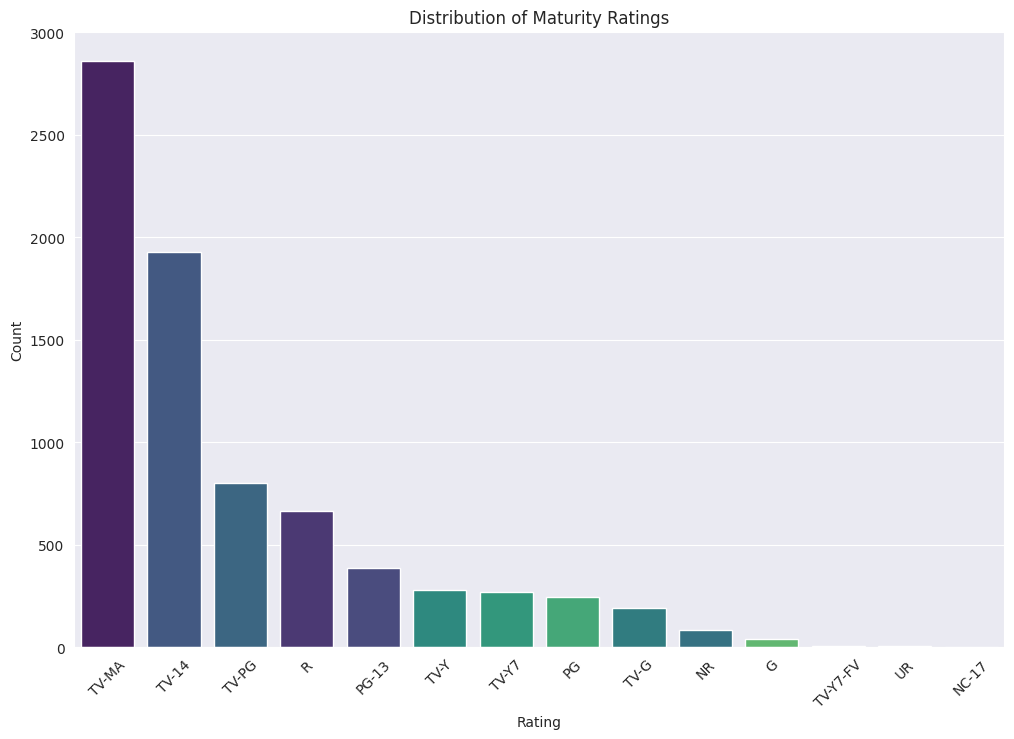

In [28]:
#maturity rating

plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=netflix_df,order=netflix_df['rating'].value_counts().index,palette='viridis',hue='rating')
plt.title('Distribution of Maturity Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Insight: A large portion of Netflix's content is aimed at mature audiences, with TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (TV-G, TV-Y).

/tmp/ipython-input-4162782871.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='year_diff',data=netflix_df,palette='viridis',bins=40,kde=True)


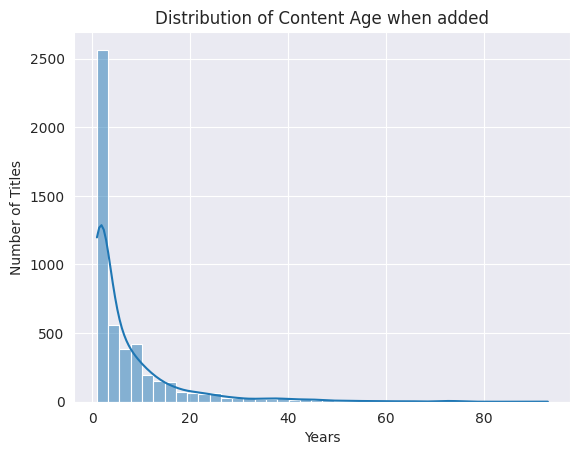

In [34]:
netflix_df['year_diff']=netflix_df['year_added']-netflix_df['release_year']


#filter out any error
netflix_df=netflix_df[netflix_df['year_diff']>0]
sns.histplot(x='year_diff',data=netflix_df,palette='viridis',bins=40,kde=True)
plt.title('Distribution of Content Age when added')
plt.xlabel('Years')
plt.ylabel('Number of Titles')
plt.show()

Insight: The large spike at 0 indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

/tmp/ipython-input-3742644552.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre',y='duration',data=genre_movies,palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'Dramas'),
  Text(1, 0, 'International Movies'),
  Text(2, 0, 'Documentaries'),
  Text(3, 0, 'Comedies')])

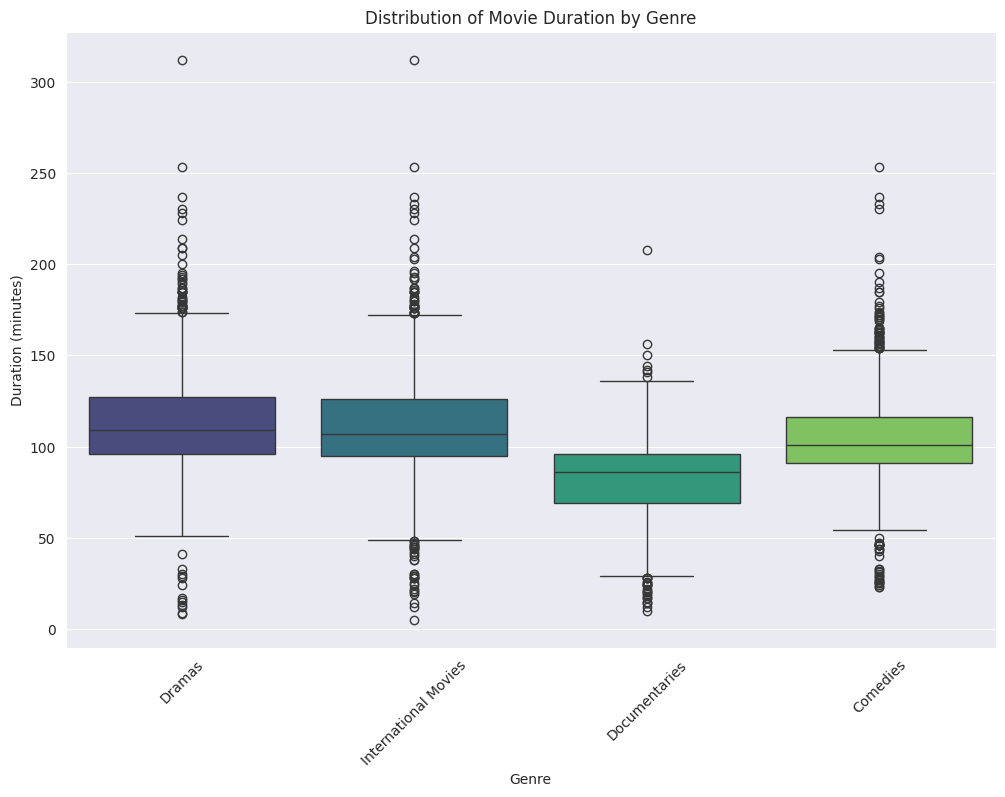

In [37]:
top_genres=genres['genre'].value_counts().index[:5] #get the top 5 genres

genre_movies=genres[(genres['type']=='Movie') & (genres['genre'].isin(top_genres))].copy()
genre_movies['duration']=genre_movies['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(12,8))
sns.boxplot(x='genre',y='duration',data=genre_movies,palette='viridis')
plt.title('Distribution of Movie Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)


Insight: While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

In [38]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,year_diff
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,1


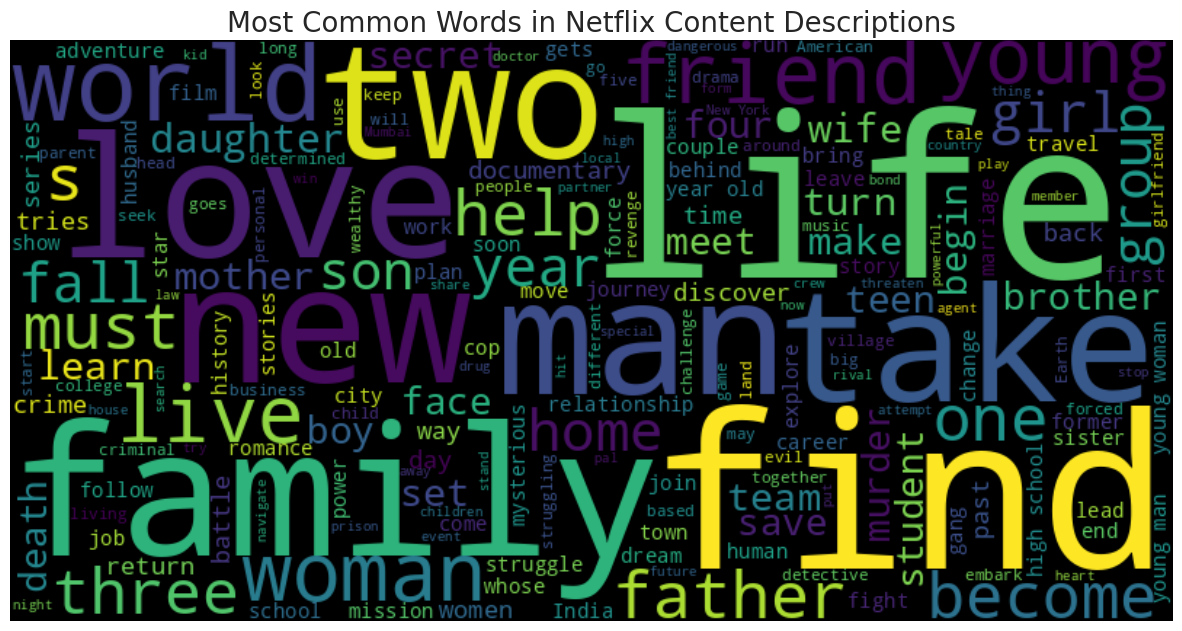

In [39]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

Final Conclusion and Summary of Insights
This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

Key Findings:

Content Strategy: Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.

Global Dominance: While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
Target Audience: The content library is skewed towards mature audiences, with TV-MA and TV-14 being the most common ratings.

Content Format & Genre: Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.

Common Themes: Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.


Limitations: This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the supply of content, not its demand or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

**Extras**


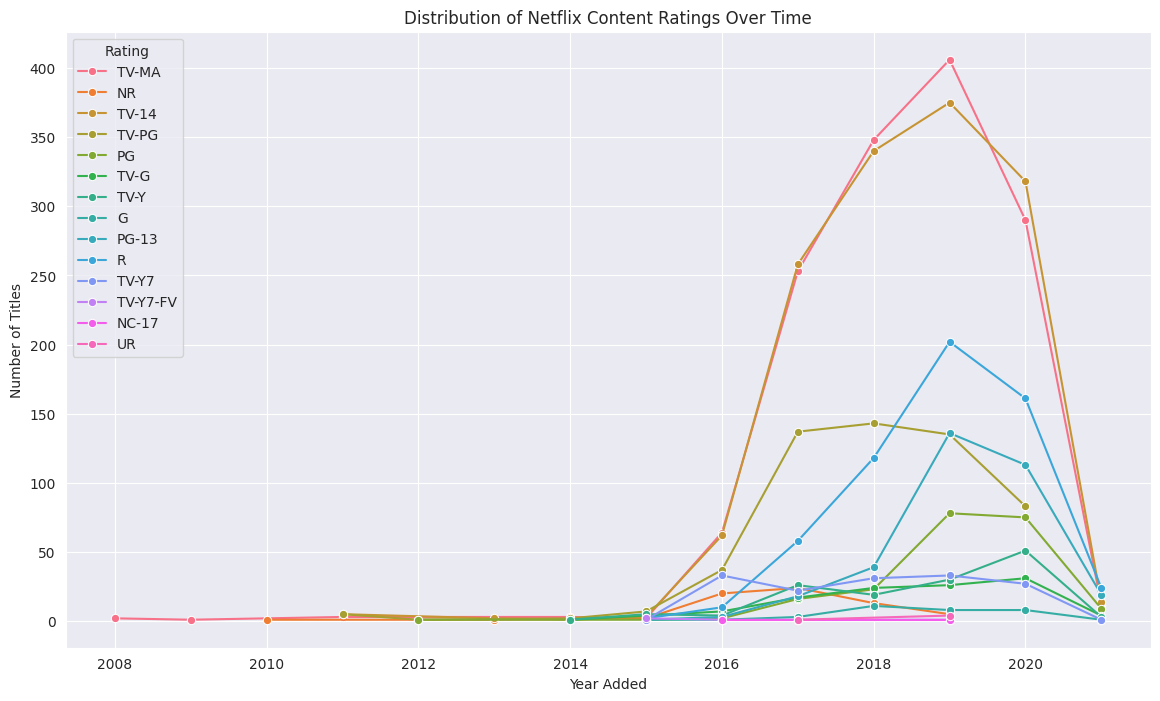

In [48]:
##How has the distribution of content ratings changed over time?

new_df=netflix_df.groupby(['year_added','rating']).size().reset_index(name='count')

plt.figure(figsize=(14,8))
sns.lineplot(
    data=new_df,
    x='year_added',
    y='count',
    hue='rating',
    marker="o"
)
plt.title("Distribution of Netflix Content Ratings Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Rating")
plt.show()



Insights: There is good amount of shows with rating of TV-MA and TV-14 which are getting added around year 2016-2020.This aligns with Netflix’s expansion strategy: more original series and region-specific TV shows targeted at adult and young adult demographics.

/tmp/ipython-input-4134376907.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0],data=df,x='type',y='content_age',palette='viridis')
/tmp/ipython-input-4134376907.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1],data=df,x='type',y='content_age',palette='viridis')


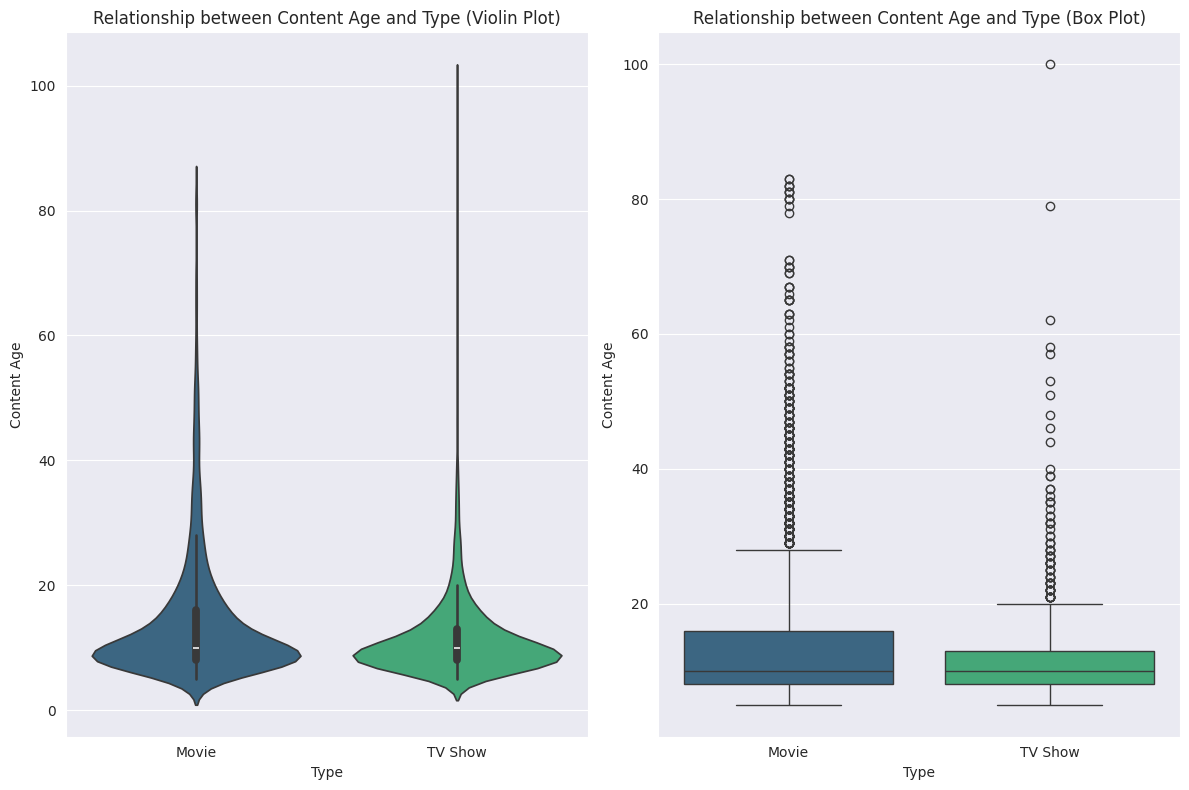

In [66]:
#Is there a relationship between content age and its type (Movie vs. TV Show)?

fig,axes=plt.subplots(1,2,figsize=(12,8))

df=netflix_df.copy()
df['content_age']=2025-df['release_year']
sns.violinplot(ax=axes[0],data=df,x='type',y='content_age',palette='viridis')
axes[0].set_title('Relationship between Content Age and Type (Violin Plot)')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Content Age')


sns.boxplot(ax=axes[1],data=df,x='type',y='content_age',palette='viridis')
axes[1].set_title('Relationship between Content Age and Type (Box Plot)')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Content Age')

plt.tight_layout()
plt.show()

Insight:Movie and TvShow ,both have a median content age of around 10 years , which shows library is comparatively new and in previous line plot which show more number of movie and tvshows are added around the year of 2015-2020.

<Axes: xlabel='count', ylabel='director'>

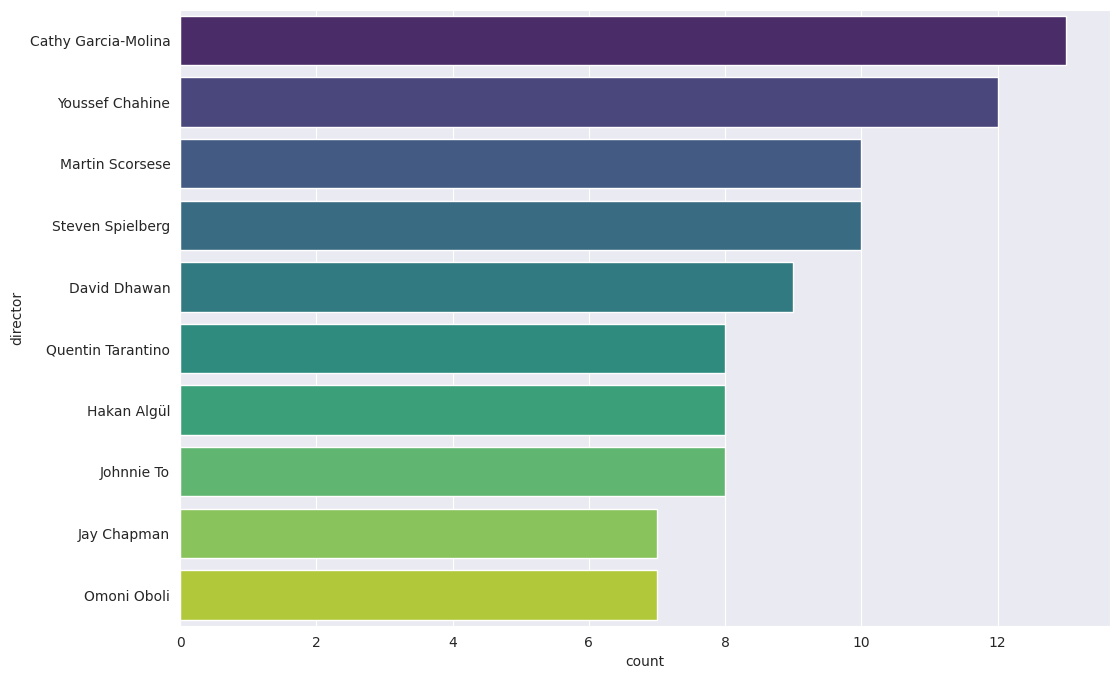

In [63]:
#Who are the top directors on Netflix?

netflix_ndf=netflix_df.copy()
netflix_ndf=netflix_ndf[netflix_ndf['director']!="Unknown"]

plt.figure(figsize=(12,8))
director_count=netflix_ndf['director'].value_counts().reset_index()
sns.barplot(y='director',x='count',data=director_count.head(10),palette='viridis',hue='director')



Cathy Garcia-Molina is the most popular director on Netflix who mainly focussed on making movie


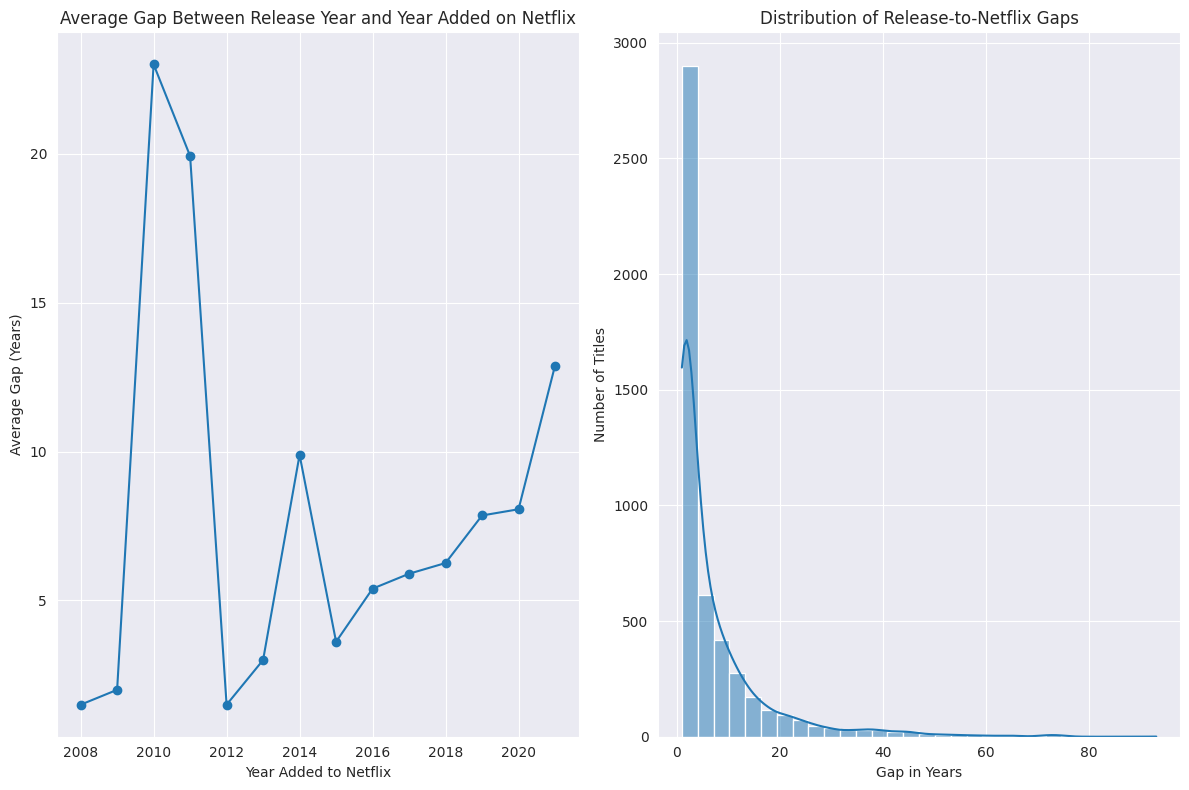

In [74]:
#Can we identify any trends in content production based on the release year vs. the year added to Netflix?
netflix_df['year_gap'] = netflix_df['year_added'] - netflix_df['release_year']

avg_gap = netflix_df.groupby('year_added')['year_gap'].mean().dropna()


fig,axes=plt.subplots(1,2,figsize=(12,8))


avg_gap.plot(ax=axes[0],kind='line', marker='o')
axes[0].set_title("Average Gap Between Release Year and Year Added on Netflix")
axes[0].set_xlabel("Year Added to Netflix")
axes[0].set_ylabel("Average Gap (Years)")


sns.histplot(ax=axes[1],data=netflix_df['year_gap'].dropna(), bins=30, kde=True)
axes[1].set_title("Distribution of Release-to-Netflix Gaps")
axes[1].set_xlabel("Gap in Years")
axes[1].set_ylabel("Number of Titles")

plt.tight_layout()
plt.show()

Insights:Mostly shows and movies were added within release of few years on netflix;
Around 2015–2018, you often see spikes in average gap → Netflix was adding older catalog titles to quickly build its library.

Post-2019, the focus shifted toward new releases and original productions, reducing the lag.

In [76]:
#What are the most common word pairs or phrases in content descriptions?
from sklearn.feature_extraction.text import CountVectorizer

descriptions = netflix_df['description'].dropna()

# Create a bigram vectorizer
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(descriptions)

# Sum occurrences of each bigram
import pandas as pd
bigram_counts = pd.DataFrame(X.sum(axis=0).T, index=vectorizer.get_feature_names_out(), columns=['count'])
bigram_counts = bigram_counts.sort_values('count', ascending=False).head(20)

print(bigram_counts)


                     count
year old                92
high school             81
young woman             81
young man               73
new york                51
small town              37
world war               34
falls love              32
los angeles             31
documentary follows     27
best friend             27
war ii                  26
road trip               26
true story              25
best friends            25
martial arts            23
based true              23
hong kong               21
fall love               20
young boy               20
